In [3]:
from PIL import Image
import requests

import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [6]:
library = pd.read_csv('library.csv', index_col=0)

library.head(2)

,title,first_published,authors,cover_img_url,languages_available,subgenre,genre
0,The Stones of Venice,1851.0,['John Ruskin'],archive.org/services/img/stonesofvenice01ruskiala,2.0,Architecture,Arts
1,Memórias póstumas de Brás Cubas,1900.0,['Machado de Assis'],archive.org/services/img/architetturamedi01arat,7.0,Architecture,Arts


All of these cover_img_urls are missing "http://" - don't forget to add!

In [11]:
test_url = 'http://archive.org/services/img/stonesofvenice01ruskiala'

In [13]:
response = requests.get(test_url)
print(response.status_code)

200


In [14]:
with open('test_image.jpg', 'wb') as f:
    f.write(response.content)

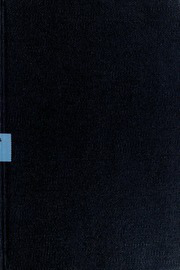

In [15]:
Image.open('test_image.jpg')

In [16]:
test_url2 = 'http://archive.org/services/img/architetturamedi01arat'

In [17]:
response = requests.get(test_url2)
print(response.status_code)

200


In [18]:
with open('test_image2.jpg', 'wb') as f:
    f.write(response.content)

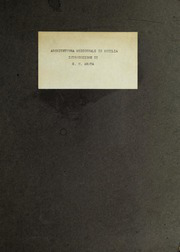

In [19]:
Image.open('test_image2.jpg')

This is working, but now I need to consider the overall flow of how I do this.

I don't actually want to save thousands of images to file.

[This StackOverflow post](https://stackoverflow.com/questions/68007907/return-an-image-taken-from-an-url-without-storing-the-image-file) helped me to devise a much more elegant plan than what I originally had in mind.

In [23]:
from io import BytesIO

In [24]:
file_like_object = BytesIO()

In [25]:
file_like_object.write(response.content)

8745

In [26]:
file_like_object.seek(0)

0

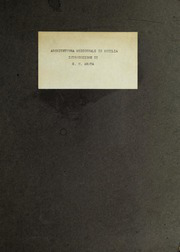

In [27]:
Image.open(file_like_object)

In [ ]:
def get_cover(URL):
    '''Takes in a string (URL), and does something with the image located at that URL. Assumes that the "http://"
    header is missing from the beginning of the string and adds it.'''
    # fix URL by adding http://
    URL = 'http://' + URL
    
    # make GET request to specified URL
    response = requests.get(URL)
    
    # create a "file-like object" to store content of response (image in bytes)
    file_like_object = BytesIO()
    file_length = file_like_object.write(response.content)
    file_like_object.seek(0) # move to top of file
    
    # now you can "open" the file-like object and treat it like an image
    Image.open(file_like_object)